In [1]:
%matplotlib inline
import pandas as pd

In [2]:
import xgboost as xgb

In [3]:
from sklearn.datasets import load_iris

iris = load_iris()

iris_data = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_target = pd.Series(iris.target)

In [4]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(iris_data, iris_target, test_size=0.2, shuffle=True)

In [5]:
dtrain = xgb.DMatrix(train_x, label=train_y)

In [6]:
param = {'max_depth': 2, 'eta': 0.5, 'objective': 'multi:softmax', 'num_class': 3}

In [7]:
num_round = 10
bst = xgb.train(param, dtrain, num_round)

In [8]:
dtest = xgb.DMatrix(test_x)
pred = bst.predict(dtest)

In [9]:
from sklearn.metrics import accuracy_score

score = accuracy_score(test_y, pred)
print('score:{0:.4f}'.format(score))

score:0.9667


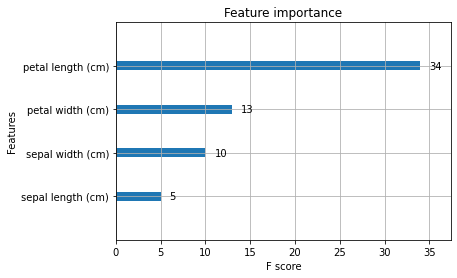

In [10]:
xgb.plot_importance(bst)

In [11]:
train_x, valid_x, train_y, valid_y = train_test_split(train_x, train_y, test_size=0.2, shuffle=True)

In [12]:
dtrain = xgb.DMatrix(train_x, label=train_y)
dvalid = xgb.DMatrix(valid_x, label=valid_y)

In [13]:
param = {'max_depth': 2, 'eta': 0.5, 'objective': 'multi:softmax', 'num_class': 3, 'eval_metric': 'mlogloss'}
evallist = [(dvalid, 'eval'), (dtrain, 'train')]

In [14]:
num_round = 10000
bst = xgb.train(param, dtrain, num_round, evallist, early_stopping_rounds=5)

[0]	eval-mlogloss:0.63191	train-mlogloss:0.56635
Multiple eval metrics have been passed: 'train-mlogloss' will be used for early stopping.

Will train until train-mlogloss hasn't improved in 5 rounds.
[1]	eval-mlogloss:0.44684	train-mlogloss:0.35407
[2]	eval-mlogloss:0.37617	train-mlogloss:0.23272
[3]	eval-mlogloss:0.32661	train-mlogloss:0.16601
[4]	eval-mlogloss:0.31864	train-mlogloss:0.12197
[5]	eval-mlogloss:0.30969	train-mlogloss:0.09579
[6]	eval-mlogloss:0.30860	train-mlogloss:0.07810
[7]	eval-mlogloss:0.30606	train-mlogloss:0.06456
[8]	eval-mlogloss:0.31123	train-mlogloss:0.05504
[9]	eval-mlogloss:0.30591	train-mlogloss:0.04745
[10]	eval-mlogloss:0.32334	train-mlogloss:0.04112
[11]	eval-mlogloss:0.31868	train-mlogloss:0.03742
[12]	eval-mlogloss:0.32201	train-mlogloss:0.03436
[13]	eval-mlogloss:0.33049	train-mlogloss:0.03302
[14]	eval-mlogloss:0.33696	train-mlogloss:0.03143
[15]	eval-mlogloss:0.34064	train-mlogloss:0.02991
[16]	eval-mlogloss:0.33576	train-mlogloss:0.02909
[17]	eva

[160]	eval-mlogloss:0.49493	train-mlogloss:0.01746
[161]	eval-mlogloss:0.49629	train-mlogloss:0.01745
[162]	eval-mlogloss:0.49588	train-mlogloss:0.01744
[163]	eval-mlogloss:0.49723	train-mlogloss:0.01743
[164]	eval-mlogloss:0.49768	train-mlogloss:0.01742
[165]	eval-mlogloss:0.49724	train-mlogloss:0.01741
[166]	eval-mlogloss:0.49765	train-mlogloss:0.01740
[167]	eval-mlogloss:0.49901	train-mlogloss:0.01739
[168]	eval-mlogloss:0.49860	train-mlogloss:0.01738
[169]	eval-mlogloss:0.49994	train-mlogloss:0.01738
[170]	eval-mlogloss:0.50037	train-mlogloss:0.01736
[171]	eval-mlogloss:0.50170	train-mlogloss:0.01736
[172]	eval-mlogloss:0.50212	train-mlogloss:0.01735
[173]	eval-mlogloss:0.50168	train-mlogloss:0.01734
[174]	eval-mlogloss:0.50207	train-mlogloss:0.01733
[175]	eval-mlogloss:0.50339	train-mlogloss:0.01732
[176]	eval-mlogloss:0.50300	train-mlogloss:0.01731
[177]	eval-mlogloss:0.50430	train-mlogloss:0.01730
[178]	eval-mlogloss:0.50472	train-mlogloss:0.01729
[179]	eval-mlogloss:0.50601	tra

[321]	eval-mlogloss:0.56156	train-mlogloss:0.01649
[322]	eval-mlogloss:0.56131	train-mlogloss:0.01649
[323]	eval-mlogloss:0.56104	train-mlogloss:0.01649
[324]	eval-mlogloss:0.56129	train-mlogloss:0.01648
[325]	eval-mlogloss:0.56213	train-mlogloss:0.01648
[326]	eval-mlogloss:0.56238	train-mlogloss:0.01648
[327]	eval-mlogloss:0.56210	train-mlogloss:0.01647
[328]	eval-mlogloss:0.56235	train-mlogloss:0.01647
[329]	eval-mlogloss:0.56318	train-mlogloss:0.01647
[330]	eval-mlogloss:0.56293	train-mlogloss:0.01646
[331]	eval-mlogloss:0.56266	train-mlogloss:0.01646
[332]	eval-mlogloss:0.56292	train-mlogloss:0.01645
[333]	eval-mlogloss:0.56374	train-mlogloss:0.01645
[334]	eval-mlogloss:0.56399	train-mlogloss:0.01645
[335]	eval-mlogloss:0.56372	train-mlogloss:0.01644
[336]	eval-mlogloss:0.56396	train-mlogloss:0.01644
[337]	eval-mlogloss:0.56367	train-mlogloss:0.01644
[338]	eval-mlogloss:0.56342	train-mlogloss:0.01643
[339]	eval-mlogloss:0.56424	train-mlogloss:0.01643
[340]	eval-mlogloss:0.56449	tra

[482]	eval-mlogloss:0.58728	train-mlogloss:0.01603
[483]	eval-mlogloss:0.58707	train-mlogloss:0.01603
[484]	eval-mlogloss:0.58728	train-mlogloss:0.01602
[485]	eval-mlogloss:0.58794	train-mlogloss:0.01602
[486]	eval-mlogloss:0.58815	train-mlogloss:0.01602
[487]	eval-mlogloss:0.58793	train-mlogloss:0.01602
[488]	eval-mlogloss:0.58813	train-mlogloss:0.01602
[489]	eval-mlogloss:0.58791	train-mlogloss:0.01601
[490]	eval-mlogloss:0.58810	train-mlogloss:0.01601
[491]	eval-mlogloss:0.58877	train-mlogloss:0.01601
[492]	eval-mlogloss:0.58857	train-mlogloss:0.01601
[493]	eval-mlogloss:0.58835	train-mlogloss:0.01600
[494]	eval-mlogloss:0.58855	train-mlogloss:0.01600
[495]	eval-mlogloss:0.58921	train-mlogloss:0.01600
[496]	eval-mlogloss:0.58942	train-mlogloss:0.01600
[497]	eval-mlogloss:0.58919	train-mlogloss:0.01599
[498]	eval-mlogloss:0.58939	train-mlogloss:0.01599
[499]	eval-mlogloss:0.59005	train-mlogloss:0.01599
[500]	eval-mlogloss:0.58985	train-mlogloss:0.01599
[501]	eval-mlogloss:0.58964	tra

[643]	eval-mlogloss:0.60893	train-mlogloss:0.01572
[644]	eval-mlogloss:0.60910	train-mlogloss:0.01572
[645]	eval-mlogloss:0.60966	train-mlogloss:0.01571
[646]	eval-mlogloss:0.60949	train-mlogloss:0.01571
[647]	eval-mlogloss:0.60930	train-mlogloss:0.01571
[648]	eval-mlogloss:0.60948	train-mlogloss:0.01571
[649]	eval-mlogloss:0.61004	train-mlogloss:0.01571
[650]	eval-mlogloss:0.61021	train-mlogloss:0.01571
[651]	eval-mlogloss:0.61003	train-mlogloss:0.01570
[652]	eval-mlogloss:0.60985	train-mlogloss:0.01570
[653]	eval-mlogloss:0.61041	train-mlogloss:0.01570
[654]	eval-mlogloss:0.61059	train-mlogloss:0.01570
[655]	eval-mlogloss:0.61040	train-mlogloss:0.01570
[656]	eval-mlogloss:0.61057	train-mlogloss:0.01570
[657]	eval-mlogloss:0.61113	train-mlogloss:0.01570
[658]	eval-mlogloss:0.61130	train-mlogloss:0.01569
[659]	eval-mlogloss:0.61111	train-mlogloss:0.01569
[660]	eval-mlogloss:0.61128	train-mlogloss:0.01569
[661]	eval-mlogloss:0.61108	train-mlogloss:0.01569
[662]	eval-mlogloss:0.61091	tra

[804]	eval-mlogloss:0.62806	train-mlogloss:0.01549
[805]	eval-mlogloss:0.62790	train-mlogloss:0.01549
[806]	eval-mlogloss:0.62804	train-mlogloss:0.01549
[807]	eval-mlogloss:0.62853	train-mlogloss:0.01549
[808]	eval-mlogloss:0.62838	train-mlogloss:0.01549
[809]	eval-mlogloss:0.62822	train-mlogloss:0.01549
[810]	eval-mlogloss:0.62837	train-mlogloss:0.01549
[811]	eval-mlogloss:0.62885	train-mlogloss:0.01549
[812]	eval-mlogloss:0.62900	train-mlogloss:0.01548
[813]	eval-mlogloss:0.62884	train-mlogloss:0.01548
[814]	eval-mlogloss:0.62899	train-mlogloss:0.01548
[815]	eval-mlogloss:0.62947	train-mlogloss:0.01548
[816]	eval-mlogloss:0.62932	train-mlogloss:0.01548
[817]	eval-mlogloss:0.62916	train-mlogloss:0.01548
[818]	eval-mlogloss:0.62931	train-mlogloss:0.01548
[819]	eval-mlogloss:0.62979	train-mlogloss:0.01547
[820]	eval-mlogloss:0.62994	train-mlogloss:0.01547
[821]	eval-mlogloss:0.62978	train-mlogloss:0.01547
[822]	eval-mlogloss:0.62993	train-mlogloss:0.01547
[823]	eval-mlogloss:0.63041	tra

[965]	eval-mlogloss:0.64499	train-mlogloss:0.01532
[966]	eval-mlogloss:0.64512	train-mlogloss:0.01532
[967]	eval-mlogloss:0.64498	train-mlogloss:0.01532
[968]	eval-mlogloss:0.64511	train-mlogloss:0.01532
[969]	eval-mlogloss:0.64554	train-mlogloss:0.01532
[970]	eval-mlogloss:0.64541	train-mlogloss:0.01532
[971]	eval-mlogloss:0.64527	train-mlogloss:0.01532
[972]	eval-mlogloss:0.64540	train-mlogloss:0.01532
[973]	eval-mlogloss:0.64582	train-mlogloss:0.01532
[974]	eval-mlogloss:0.64595	train-mlogloss:0.01532
[975]	eval-mlogloss:0.64581	train-mlogloss:0.01532
[976]	eval-mlogloss:0.64594	train-mlogloss:0.01531
[977]	eval-mlogloss:0.64579	train-mlogloss:0.01531
[978]	eval-mlogloss:0.64566	train-mlogloss:0.01531
[979]	eval-mlogloss:0.64608	train-mlogloss:0.01531
[980]	eval-mlogloss:0.64621	train-mlogloss:0.01531
[981]	eval-mlogloss:0.64607	train-mlogloss:0.01531
[982]	eval-mlogloss:0.64620	train-mlogloss:0.01531
[983]	eval-mlogloss:0.64662	train-mlogloss:0.01531
[984]	eval-mlogloss:0.64675	tra

[1124]	eval-mlogloss:0.65922	train-mlogloss:0.01519
[1125]	eval-mlogloss:0.65959	train-mlogloss:0.01519
[1126]	eval-mlogloss:0.65972	train-mlogloss:0.01519
[1127]	eval-mlogloss:0.65959	train-mlogloss:0.01519
[1128]	eval-mlogloss:0.65971	train-mlogloss:0.01519
[1129]	eval-mlogloss:0.66009	train-mlogloss:0.01519
[1130]	eval-mlogloss:0.66021	train-mlogloss:0.01519
[1131]	eval-mlogloss:0.66008	train-mlogloss:0.01519
[1132]	eval-mlogloss:0.66019	train-mlogloss:0.01519
[1133]	eval-mlogloss:0.66006	train-mlogloss:0.01519
[1134]	eval-mlogloss:0.65994	train-mlogloss:0.01519
[1135]	eval-mlogloss:0.66032	train-mlogloss:0.01519
[1136]	eval-mlogloss:0.66043	train-mlogloss:0.01519
[1137]	eval-mlogloss:0.66031	train-mlogloss:0.01519
[1138]	eval-mlogloss:0.66043	train-mlogloss:0.01518
[1139]	eval-mlogloss:0.66080	train-mlogloss:0.01518
[1140]	eval-mlogloss:0.66092	train-mlogloss:0.01518
[1141]	eval-mlogloss:0.66080	train-mlogloss:0.01518
[1142]	eval-mlogloss:0.66068	train-mlogloss:0.01518
[1143]	eval-

[1282]	eval-mlogloss:0.67260	train-mlogloss:0.01509
[1283]	eval-mlogloss:0.67294	train-mlogloss:0.01509
[1284]	eval-mlogloss:0.67305	train-mlogloss:0.01509
[1285]	eval-mlogloss:0.67293	train-mlogloss:0.01509
[1286]	eval-mlogloss:0.67304	train-mlogloss:0.01509
[1287]	eval-mlogloss:0.67338	train-mlogloss:0.01509
[1288]	eval-mlogloss:0.67327	train-mlogloss:0.01509
[1289]	eval-mlogloss:0.67316	train-mlogloss:0.01509
[1290]	eval-mlogloss:0.67327	train-mlogloss:0.01509
[1291]	eval-mlogloss:0.67361	train-mlogloss:0.01508
[1292]	eval-mlogloss:0.67372	train-mlogloss:0.01508
[1293]	eval-mlogloss:0.67361	train-mlogloss:0.01508
[1294]	eval-mlogloss:0.67371	train-mlogloss:0.01508
[1295]	eval-mlogloss:0.67405	train-mlogloss:0.01508
[1296]	eval-mlogloss:0.67394	train-mlogloss:0.01508
[1297]	eval-mlogloss:0.67383	train-mlogloss:0.01508
[1298]	eval-mlogloss:0.67394	train-mlogloss:0.01508
[1299]	eval-mlogloss:0.67428	train-mlogloss:0.01508
[1300]	eval-mlogloss:0.67439	train-mlogloss:0.01508
[1301]	eval-

[1440]	eval-mlogloss:0.68475	train-mlogloss:0.01500
[1441]	eval-mlogloss:0.68506	train-mlogloss:0.01500
[1442]	eval-mlogloss:0.68496	train-mlogloss:0.01500
[1443]	eval-mlogloss:0.68486	train-mlogloss:0.01500
[1444]	eval-mlogloss:0.68496	train-mlogloss:0.01500
[1445]	eval-mlogloss:0.68527	train-mlogloss:0.01500
[1446]	eval-mlogloss:0.68537	train-mlogloss:0.01500
[1447]	eval-mlogloss:0.68527	train-mlogloss:0.01500
[1448]	eval-mlogloss:0.68536	train-mlogloss:0.01500
[1449]	eval-mlogloss:0.68567	train-mlogloss:0.01500
[1450]	eval-mlogloss:0.68558	train-mlogloss:0.01500
[1451]	eval-mlogloss:0.68547	train-mlogloss:0.01500
[1452]	eval-mlogloss:0.68557	train-mlogloss:0.01500
[1453]	eval-mlogloss:0.68588	train-mlogloss:0.01500
[1454]	eval-mlogloss:0.68598	train-mlogloss:0.01500
[1455]	eval-mlogloss:0.68588	train-mlogloss:0.01500
[1456]	eval-mlogloss:0.68597	train-mlogloss:0.01500
[1457]	eval-mlogloss:0.68628	train-mlogloss:0.01500
[1458]	eval-mlogloss:0.68618	train-mlogloss:0.01500
[1459]	eval-

[1598]	eval-mlogloss:0.69606	train-mlogloss:0.01493
[1599]	eval-mlogloss:0.69597	train-mlogloss:0.01493
[1600]	eval-mlogloss:0.69606	train-mlogloss:0.01493
[1601]	eval-mlogloss:0.69596	train-mlogloss:0.01493
[1602]	eval-mlogloss:0.69604	train-mlogloss:0.01493
[1603]	eval-mlogloss:0.69633	train-mlogloss:0.01493
[1604]	eval-mlogloss:0.69642	train-mlogloss:0.01493
[1605]	eval-mlogloss:0.69632	train-mlogloss:0.01493
[1606]	eval-mlogloss:0.69623	train-mlogloss:0.01493
[1607]	eval-mlogloss:0.69652	train-mlogloss:0.01493
[1608]	eval-mlogloss:0.69661	train-mlogloss:0.01493
[1609]	eval-mlogloss:0.69651	train-mlogloss:0.01493
[1610]	eval-mlogloss:0.69660	train-mlogloss:0.01493
[1611]	eval-mlogloss:0.69689	train-mlogloss:0.01493
[1612]	eval-mlogloss:0.69680	train-mlogloss:0.01493
[1613]	eval-mlogloss:0.69670	train-mlogloss:0.01493
[1614]	eval-mlogloss:0.69679	train-mlogloss:0.01493
[1615]	eval-mlogloss:0.69708	train-mlogloss:0.01493
[1616]	eval-mlogloss:0.69717	train-mlogloss:0.01493
[1617]	eval-

[1756]	eval-mlogloss:0.70629	train-mlogloss:0.01487
[1757]	eval-mlogloss:0.70621	train-mlogloss:0.01487
[1758]	eval-mlogloss:0.70612	train-mlogloss:0.01487
[1759]	eval-mlogloss:0.70639	train-mlogloss:0.01487
[1760]	eval-mlogloss:0.70647	train-mlogloss:0.01487
[1761]	eval-mlogloss:0.70638	train-mlogloss:0.01487
[1762]	eval-mlogloss:0.70647	train-mlogloss:0.01487
[1763]	eval-mlogloss:0.70673	train-mlogloss:0.01487
[1764]	eval-mlogloss:0.70681	train-mlogloss:0.01487
[1765]	eval-mlogloss:0.70673	train-mlogloss:0.01487
[1766]	eval-mlogloss:0.70664	train-mlogloss:0.01487
[1767]	eval-mlogloss:0.70690	train-mlogloss:0.01487
[1768]	eval-mlogloss:0.70699	train-mlogloss:0.01487
[1769]	eval-mlogloss:0.70690	train-mlogloss:0.01487
[1770]	eval-mlogloss:0.70699	train-mlogloss:0.01487
[1771]	eval-mlogloss:0.70725	train-mlogloss:0.01487
[1772]	eval-mlogloss:0.70733	train-mlogloss:0.01487
[1773]	eval-mlogloss:0.70724	train-mlogloss:0.01487
[1774]	eval-mlogloss:0.70716	train-mlogloss:0.01487
[1775]	eval-

[1914]	eval-mlogloss:0.71596	train-mlogloss:0.01482
[1915]	eval-mlogloss:0.71621	train-mlogloss:0.01482
[1916]	eval-mlogloss:0.71613	train-mlogloss:0.01482
[1917]	eval-mlogloss:0.71637	train-mlogloss:0.01482
[1918]	eval-mlogloss:0.71645	train-mlogloss:0.01482
[1919]	eval-mlogloss:0.71637	train-mlogloss:0.01482
[1920]	eval-mlogloss:0.71645	train-mlogloss:0.01482
[1921]	eval-mlogloss:0.71669	train-mlogloss:0.01482
[1922]	eval-mlogloss:0.71677	train-mlogloss:0.01482
[1923]	eval-mlogloss:0.71669	train-mlogloss:0.01482
[1924]	eval-mlogloss:0.71661	train-mlogloss:0.01482
[1925]	eval-mlogloss:0.71685	train-mlogloss:0.01482
[1926]	eval-mlogloss:0.71693	train-mlogloss:0.01482
[1927]	eval-mlogloss:0.71685	train-mlogloss:0.01482
[1928]	eval-mlogloss:0.71693	train-mlogloss:0.01482
[1929]	eval-mlogloss:0.71717	train-mlogloss:0.01482
[1930]	eval-mlogloss:0.71709	train-mlogloss:0.01482
[1931]	eval-mlogloss:0.71701	train-mlogloss:0.01482
[1932]	eval-mlogloss:0.71709	train-mlogloss:0.01482
[1933]	eval-

[2072]	eval-mlogloss:0.72544	train-mlogloss:0.01478
[2073]	eval-mlogloss:0.72536	train-mlogloss:0.01478
[2074]	eval-mlogloss:0.72544	train-mlogloss:0.01478
[2075]	eval-mlogloss:0.72566	train-mlogloss:0.01478
[2076]	eval-mlogloss:0.72574	train-mlogloss:0.01478
[2077]	eval-mlogloss:0.72566	train-mlogloss:0.01478
[2078]	eval-mlogloss:0.72559	train-mlogloss:0.01478
[2079]	eval-mlogloss:0.72581	train-mlogloss:0.01477
[2080]	eval-mlogloss:0.72589	train-mlogloss:0.01477
[2081]	eval-mlogloss:0.72581	train-mlogloss:0.01477
[2082]	eval-mlogloss:0.72588	train-mlogloss:0.01477
[2083]	eval-mlogloss:0.72611	train-mlogloss:0.01477
[2084]	eval-mlogloss:0.72618	train-mlogloss:0.01477
[2085]	eval-mlogloss:0.72611	train-mlogloss:0.01477
[2086]	eval-mlogloss:0.72603	train-mlogloss:0.01477
[2087]	eval-mlogloss:0.72626	train-mlogloss:0.01477
[2088]	eval-mlogloss:0.72633	train-mlogloss:0.01477
[2089]	eval-mlogloss:0.72626	train-mlogloss:0.01477
[2090]	eval-mlogloss:0.72633	train-mlogloss:0.01477
[2091]	eval-

[2230]	eval-mlogloss:0.73414	train-mlogloss:0.01474
[2231]	eval-mlogloss:0.73407	train-mlogloss:0.01474
[2232]	eval-mlogloss:0.73400	train-mlogloss:0.01474
[2233]	eval-mlogloss:0.73421	train-mlogloss:0.01474
[2234]	eval-mlogloss:0.73428	train-mlogloss:0.01474
[2235]	eval-mlogloss:0.73421	train-mlogloss:0.01474
[2236]	eval-mlogloss:0.73428	train-mlogloss:0.01474
[2237]	eval-mlogloss:0.73449	train-mlogloss:0.01474
[2238]	eval-mlogloss:0.73456	train-mlogloss:0.01474
[2239]	eval-mlogloss:0.73449	train-mlogloss:0.01474
[2240]	eval-mlogloss:0.73442	train-mlogloss:0.01474
[2241]	eval-mlogloss:0.73463	train-mlogloss:0.01474
[2242]	eval-mlogloss:0.73470	train-mlogloss:0.01474
[2243]	eval-mlogloss:0.73463	train-mlogloss:0.01473
[2244]	eval-mlogloss:0.73470	train-mlogloss:0.01473
[2245]	eval-mlogloss:0.73491	train-mlogloss:0.01473
[2246]	eval-mlogloss:0.73498	train-mlogloss:0.01473
[2247]	eval-mlogloss:0.73491	train-mlogloss:0.01473
[2248]	eval-mlogloss:0.73484	train-mlogloss:0.01473
[2249]	eval-

[2388]	eval-mlogloss:0.74216	train-mlogloss:0.01470
[2389]	eval-mlogloss:0.74210	train-mlogloss:0.01470
[2390]	eval-mlogloss:0.74216	train-mlogloss:0.01470
[2391]	eval-mlogloss:0.74236	train-mlogloss:0.01470
[2392]	eval-mlogloss:0.74243	train-mlogloss:0.01470
[2393]	eval-mlogloss:0.74262	train-mlogloss:0.01470
[2394]	eval-mlogloss:0.74269	train-mlogloss:0.01470
[2395]	eval-mlogloss:0.74262	train-mlogloss:0.01470
[2396]	eval-mlogloss:0.74256	train-mlogloss:0.01470
[2397]	eval-mlogloss:0.74276	train-mlogloss:0.01470
[2398]	eval-mlogloss:0.74282	train-mlogloss:0.01470
[2399]	eval-mlogloss:0.74276	train-mlogloss:0.01470
[2400]	eval-mlogloss:0.74282	train-mlogloss:0.01470
[2401]	eval-mlogloss:0.74302	train-mlogloss:0.01470
[2402]	eval-mlogloss:0.74295	train-mlogloss:0.01470
[2403]	eval-mlogloss:0.74289	train-mlogloss:0.01470
[2404]	eval-mlogloss:0.74295	train-mlogloss:0.01470
[2405]	eval-mlogloss:0.74315	train-mlogloss:0.01470
[2406]	eval-mlogloss:0.74321	train-mlogloss:0.01470
[2407]	eval-

In [15]:
print('Best Score:{0:.4f}, Iteratin:{1:d}, Ntree_Limit:{2:d}'.format(
     bst.best_score, bst.best_iteration, bst.best_ntree_limit))

Best Score:0.0147, Iteratin:2452, Ntree_Limit:2453


In [16]:
dtest = xgb.DMatrix(test_x)
pred = bst.predict(dtest, ntree_limit=bst.best_ntree_limit)

In [17]:
from sklearn.metrics import accuracy_score

score = accuracy_score(test_y, pred)
print('score:{0:.4f}'.format(score))

score:0.9667


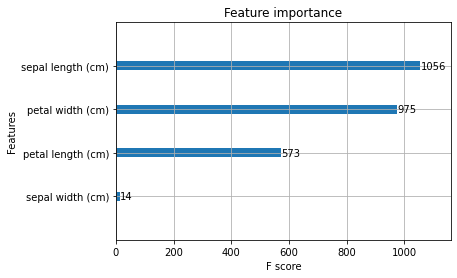

In [18]:
xgb.plot_importance(bst)